# C++/Python Interactive Slides - XTensor & Numpy side by side

<center>Sebastiaan van der Tol - Team SCHAAP</center>
https://gitlab.com/basvandertol/interactive-slides


# Introduction

1. How to make interactive slides using Jupyter notebooks
2. Demo XTensor (C++) and Numpy (Python) side by side


# Interactive Slides with Jupyter Notebooks
- RISE Reveal.js
- Cling - XEUS Cling 
- Script Of Scripts Notebooks to run multiple kernels in one notebook

.YML file for conda availabe in repository to setup environment

# Introduction to XTensor

`xtensor` is a C++ library meant for numerical analysis with multi-dimensional array expressions.

`xtensor` provides

 - an extensible expression system enabling **lazy broadcasting**.
 - an API following the idioms of the **C++ standard library**.
 - tools to manipulate array expressions and build upon `xtensor`.

The implementation of the containers of `xtensor` is inspired by [NumPy](http://www.numpy.org), the Python array programming library. **Adaptors** for existing data structures to be plugged into our expression system can easily be written. In fact, `xtensor` can be used to **process `numpy` data structures inplace** using Python's [buffer protocol](https://docs.python.org/3/c-api/buffer.html).

`xtensor` requires a modern C++ compiler supporting C++14. The following C+ compilers are supported:

 - On Windows platforms, Visual C++ 2015 Update 2, or more recent
 - On Unix platforms, gcc 4.9 or a recent version of Clang

# Cling Preamble


In [1]:
#pragma cling load("libfftw3f")

#include <iostream>

#include <xtensor/xarray.hpp>
#include <xtensor/xio.hpp>
#include <xtensor/xview.hpp>
#include <xtensor/xadapt.hpp>
#include <xtensor/xvectorize.hpp>

std::cout << "Hello" << std::endl;

Hello


# Slicing and Arithmetic

In [ ]:
xt::xarray<double> arr1
  {{1.0, 2.0, 3.0},
   {2.0, 5.0, 7.0},
   {2.0, 5.0, 7.0}};

xt::xarray<double> arr2
  {5.0, 6.0, 7.0};

std::cout << (xt::view(arr1, 1, xt::all()) + arr2).shape();


In [ ]:
import numpy as np
A = np.array(
[[1.0, 2.0, 3.0],
   [2.0, 5.0, 7.0],
   [2.0, 5.0, 7.0]])
B = np.array([5.0, 6.0, 7.0])
A[1, :] + B

# Adapt: create xtensor views from other containers

In [2]:
// Set of directiontions at exact integer pixels
std::vector<std::pair<int, int>> directions_int = {{0, 0}, {1, 3}, {4, 6}};
std::vector<std::pair<float, float>> directions(directions_int.begin(), directions_int.end());
std::vector<size_t> shape = {directions.size(), 2};
size_t size = directions.size() * 2;
auto p = xt::adapt(reinterpret_cast<const float*>(directions.data()), size,
                   xt::no_ownership(), shape);
xt::eval<xt::xarray<float>>(p)

0. 0. 1. 3. 4. 6.

# Broadcasting

In [3]:
auto p1 = xt::view(p, xt::all(), xt::newaxis(), xt::all());
auto p2 = xt::view(p, xt::newaxis(), xt::all(), xt::all());
auto difference = p1 - p2;
auto distance_squared = xt::sum(difference * difference, {2});
distance_squared

0. 10. 52. 10. 0. 18. 52. 18. 0.

# Initialize a 1-D array and reshape it inplace

In [ ]:
#include <iostream>
#include "xtensor/xarray.hpp"
#include "xtensor/xio.hpp"

In [4]:
xt::xarray<int> arr
  {1, 2, 3, 4, 5, 6, 7, 8, 9};

arr.reshape({3, 3});

arr

1 2 3 4 5 6 7 8 9

### Random arrays with the random module

In [5]:
#include <iostream>
#include "xtensor/xrandom.hpp"

In [6]:
xt::xarray<double> arr5 = xt::random::randn<double>({4, 3});
arr5

0.13453 -0.146382 0.46065 -1.871384 0.163712 -0.214253 0.298595 -0.827944 0.010215 1.055466 -0.546841 1.174568

In [7]:
xt::random::randn<double>({5, 3, 8, 10}) > 0.2

true false true ⋯ false false false false false false ⋯ true true false true false false ⋯ false false false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ true false true ⋯ true true false true false true ⋯ true false true true false true ⋯ false true false false false true ⋯ true true true true false false ⋯ false false false false true false ⋯ false false true ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false true true ⋯ true false false true false true ⋯ true true true false true false ⋯ true true true true false true ⋯ false true false false false false ⋯ true true false true false false ⋯ true false false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ true false true ⋯ false false false true false false ⋯ true false true false false false ⋯ false false true false true false ⋯ false false false false false false ⋯ false false true true true false ⋯ false true false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false true false ⋯ false false true false true true ⋯ false true false false false false ⋯ false false true false false false ⋯ true false false false true true ⋯ false true true false true true ⋯ true false false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false false false ⋯ true false true false true false ⋯ true false true false false false ⋯ false false true false false false ⋯ false true false true false false ⋯ false false true false false false ⋯ true false false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false false true ⋯ false false false true false false ⋯ false false false true false true ⋯ false false false true false true ⋯ false false false false true false ⋯ true false true true false true ⋯ false false false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false false true ⋯ true false false true false true ⋯ true false false false true false ⋯ true false false true false true ⋯ false false true false true false ⋯ true true true false false false ⋯ true false true ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ true false true ⋯ true true false false true false ⋯ false false false true true true ⋯ true false false false true false ⋯ false true false false true false ⋯ true false true true false false ⋯ false false true ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false false true ⋯ false false false true true false ⋯ false true false false false true ⋯ true false true true false false ⋯ false false false true false false ⋯ false false false true false true ⋯ false false false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false false false ⋯ true false false true false false ⋯ false true false false false true ⋯ false false true true true true ⋯ false true true true true false ⋯ false true true false false false ⋯ false false false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false true true ⋯ true false true false false true ⋯ true false false false true false ⋯ false false false false true true ⋯ true false false false false true ⋯ true true false true false false ⋯ false false true ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ true true false ⋯ true false true false true true ⋯ false true false true true false ⋯ false true false false false true ⋯ true true false false false false ⋯ false true true false false false ⋯ false false true ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false false false ⋯ false false false false false false ⋯ true false false true false true ⋯ true true false false true true ⋯ false true true false false false ⋯ true true false false false false ⋯ false true false ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false true false ⋯ false false true true true true ⋯ false false false true false false ⋯ false false false false false false ⋯ false false false false true true ⋯ true true true false false false ⋯ true false true ⋮ ⋮ ⋮ ⋱ ⋮ ⋮ ⋮ false false false ⋯ false true false false false false ⋯ true false true false false false ⋯ true false false

# Using `linspace`, `arange`, `ones`, `zeros`

In [9]:
#include "xtensor/xbuilder.hpp"

In [10]:
xt::xarray<double> ar = xt::linspace<double>(0.0, 10.0, 12);
ar.reshape({4, 3});
ar

0. 0.909091 1.818182 2.727273 3.636364 4.545455 5.454545 6.363636 7.272727 8.181818 9.090909 10.

In [11]:
xt::xarray<double> fones = xt::ones<float>({2, 2});
fones

1. 1. 1. 1.

In [12]:
xt::arange<int>(1569325055)

0 1 2 ⋮ 1569325052 1569325053 1569325054

# Using standard algorithms with xexpressions

In [13]:
#include <algorithm>

In [14]:
xt::xarray<double> frand = xt::random::randn<double>({2, 2});

// begin() and end() provide and iterator pair iterating over the xexpression in a row-major fashion
std::cout << std::accumulate(frand.begin(), frand.end(), 0.0);

frand

-2.01197

-2.339393 0.747579 -0.307341 -0.112812

# Iterating over a prescribed broadcasted shape

In [ ]:
// begin(shape) and end(shape) provide and iterator pair iterating
// over the xexpression broadcasted to the prescrived shape in a row-major fashion
std::vector<std::size_t> shape = {3, 2, 2};
std::cout << std::accumulate(frand.begin(shape), frand.end(shape), 0.0);

# xtensor-blas

<center>Blas bindings for xtensor.</center>

`xtensor-blas` is an extension to the xtensor library, offering bindings to BLAS and LAPACK libraries 
through cxxblas and cxxlapack from the [FLENS](https://github.com/michael-lehn/FLENS) project.

`xtensor-blas` currently provides non-broadcasting `dot`, `norm` (1- and 2-norm for vectors), `inverse`, `solve`,
`eig`, `cross`, `det`, `slogdet`, `matrix_rank`, `inv`, `cholesky`, `qr`, `svd` in the `xt::linalg` namespace (check the corresponding `xlinalg.hpp` header for the function signatures). The functions, and signatures, are trying to be 1-to-1 equivalent to NumPy.
Low-level functions to interface with BLAS or LAPACK with xtensor containers are also offered 
in the `blas` and `lapack` namespace.

`xtensor` and `xtensor-blas` require a modern C++ compiler supporting C++14. The following C++ compilers are supported:

 - On Windows platforms, Visual C++ 2015 Update 2, or more recent
 - On Unix platforms, gcc 4.9 or a recent version of Clang

In [15]:
#include "xtensor-blas/xlinalg.hpp"

In [16]:
xt::xtensor<double, 2> m = {{1.5, 0.5}, {0.7, 1.0}};
m

1.5 0.5 0.7 1.

In [17]:
std::cout << "Matrix rank: " << std::endl << xt::linalg::matrix_rank(m);

Matrix rank: 
2

In [18]:
std::cout << "Matrix inverse: " << std::endl << xt::linalg::inv(m);

Matrix inverse: 
{{ 0.869565, -0.434783},
 {-0.608696,  1.304348}}

In [19]:
std::cout << "Eigen values: " << std::endl << xt::linalg::eigvals(m);

Eigen values: 
{ 1.892262+0.i,  0.607738+0.i}

In [20]:
xt::xarray<double> arg1 = xt::arange<double>(9);
xt::xarray<double> arg2 = xt::arange<double>(18);
arg1.reshape({3, 3});
arg2.reshape({2, 3, 3});
std::cout << xt::linalg::dot(arg1, arg2) << std::endl;

{{{  15.,   18.,   21.},
  {  42.,   45.,   48.}},
 {{  42.,   54.,   66.},
  { 150.,  162.,  174.}},
 {{  69.,   90.,  111.},
  { 258.,  279.,  300.}}}


# File Input and Output

In [21]:
#include <xtensor/xnpy.hpp>
std::cout << arr5 << std::endl;
xt::dump_npy("out.npy", arr5);

{{ 0.13453 , -0.146382,  0.46065 },
 {-1.871384,  0.163712, -0.214253},
 { 0.298595, -0.827944,  0.010215},
 { 1.055466, -0.546841,  1.174568}}


In [22]:
import numpy as np
A = np.load("out.npy")
print(A)

[[ 0.13452966 -0.14638178  0.46065018]
 [-1.87138431  0.16371168 -0.21425339]
 [ 0.29859526 -0.82794418  0.01021543]
 [ 1.05546644 -0.546841    1.17456768]]


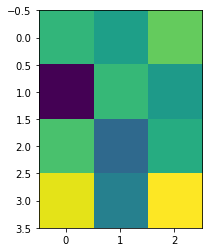

In [23]:
from matplotlib import pyplot as plt
plt.imshow(A)

# xtensor-fftw

In [24]:
#include <xtensor-fftw/basic.hpp>

const int subgrid_size = 4;

xt::xarray<std::complex<float>> screen =
      xt::ones<std::complex<float>>({subgrid_size, subgrid_size});

xt::xarray<std::complex<float>> screen_ft = xt::fftw::fft2(screen);
screen_ft


16.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i 0.+0.i

# Numpy to XTensor
https://xtensor.readthedocs.io/en/latest/numpy.html

# Conclusions

- Jupyter notebooks provide an easy way to make interactive slides
- XTensor really delivers on its promise: it makes array manipulation and linear algebra in C++ (almost) as easy as with Numpy in Python
